In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
img=cv2.imread("images/faces2.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(img)


In [3]:
faceCascade=cv2.CascadeClassifier("images/haarcascade_frontalface_default.xml")

In [4]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(5, 5)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

تابع بالا لیستی از مستطیل هارو که به نظر میرسه چهره باشه برمیگردونه ، بعدش یه حلقه از این مستطیل ها ایجاد خواهیم کرد

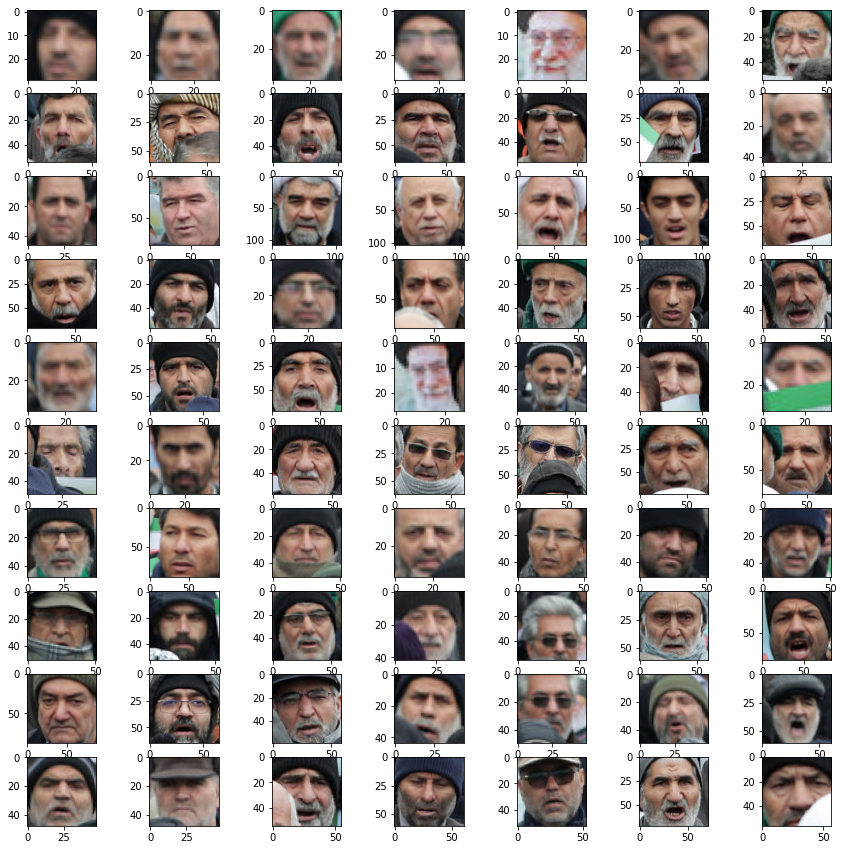

In [5]:
#print(faces)
i=1
plt.figure(figsize=(15,15))
for (x, y, w, h) in faces:
    plt.subplot(10,7,i)
    i=i+1
    plt.imshow(img[y:y+h,x:x+w])
    

Found  faces! 70


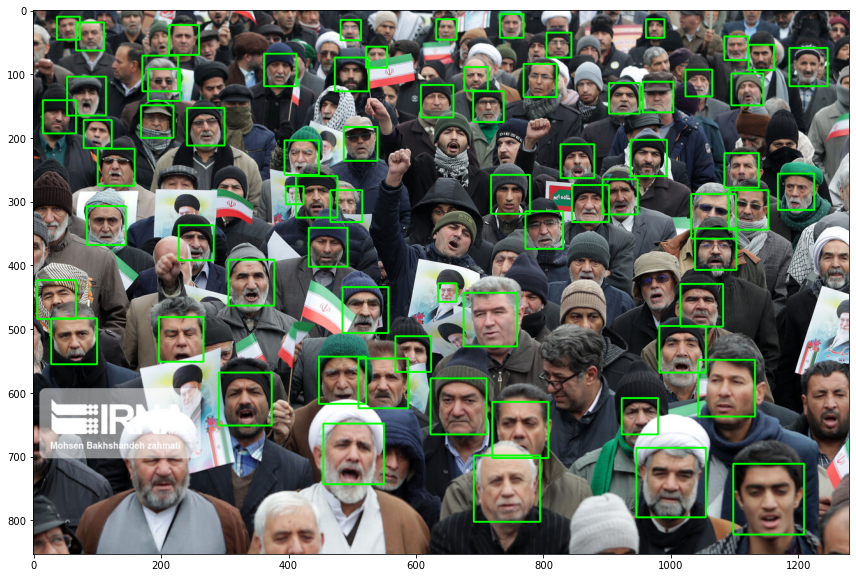

In [6]:
print ('Found  faces!',len(faces))
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure(figsize=(15,10))
plt.imshow(img )

In [7]:
#print(faces)

In [8]:

faceCascade = cv2.CascadeClassifier("images/haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier('images/haarcascade_eye.xml')
smileCascade = cv2.CascadeClassifier('images/haarcascade_smile.xml')

In [9]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        )
    for (x, y, w, h) in faces:
        if w > 250 :
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            
    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
    
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)
         
    
    # Display the resulting frame
    cv2.imshow('Video', frame) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
video_capture.release()